Regresión Lineal

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
houses = pd.read_csv("USA_Housing.csv")

In [6]:
houses.head(20)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [7]:
houses.info() #Ver información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
houses.describe() #Mostrar las diferentes operaciones del dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
houses.columns #Mostrar los nombres de cada una de las columnas

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
houses['Price'] #Acceder al nombre de la columna

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [11]:
houses['Avg. Area Number of Rooms']

0       7.009188
1       6.730821
2       8.512727
3       5.586729
4       7.839388
          ...   
4995    6.137356
4996    6.576763
4997    4.805081
4998    7.130144
4999    6.792336
Name: Avg. Area Number of Rooms, Length: 5000, dtype: float64

C:\Users\erick\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

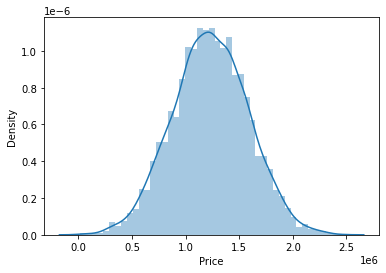

In [12]:
sns.distplot(houses['Price']) #Ver la distribución del precio del dataset

<AxesSubplot:>

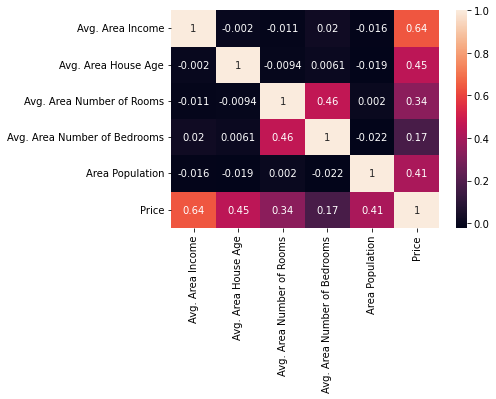

In [13]:
sns.heatmap(houses.corr(), annot=True) #Mapa de calor de relación entre las columnas

Machine Learning

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
houses.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [16]:
houses.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

Dividir el dataset en ejes de x y y. "x" serán las columnas númericas y la "y" será la variable objetivo (precio) por que se quiere estimar el precio futuro

In [19]:
X = houses[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']] #Seleccionar las columnas

In [26]:
Y = houses[['Price']] #Seleccionar la columna price

Dividir los datos en datos de entrenamiento y datos de prueba

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 42) #30% para prueba y 70% para test. random_state para tomar los números del dataset de forma aleatoria 

In [51]:
linear_regression_m = LinearRegression()
linear_regression_m.fit(X_train, Y_train) #Entrenar el modelo

LinearRegression()

Evaluar el modelo

In [53]:
from sklearn import metrics

In [56]:
predictions = linear_regression_m.predict(X_test) #Generar las predicciones

In [55]:
predictions #Valores de las casas según el modelo

array([[1308536.13592605],
       [1237122.72746462],
       [1243835.62817079],
       ...,
       [1457119.79297226],
       [1483428.95309313],
       [1047510.59737201]])

In [58]:
Y_test

,Price
1501,1.339096e+06
2586,1.251794e+06
2653,1.340095e+06
1055,1.431508e+06
705,1.042374e+06
...,...
3563,1.348222e+06
1538,1.309937e+06
1837,1.472887e+06
2380,1.409762e+06


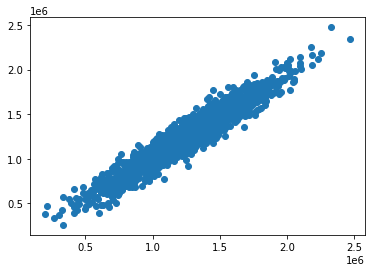

In [59]:
plt.scatter(Y_test, predictions)

sns.distplot(Y_test - predictions) #Histograma

Evaluar de manera númerica el modelo. 
En cuanto más menor sea el valor, mejor es el modelo predicción

MAE (Mean absolute error) - Media del valor absoluto de los errores

In [63]:
metrics.mean_absolute_error(Y_test, predictions) 

81135.5660933688

MSE (Media de los errores al cuadrado)

In [65]:
metrics.mean_squared_error(Y_test, predictions)

10068422551.400927

RMSE (La raíz cuadrada de la media de los errores al cuadrado)

In [68]:
np.sqrt(metrics.mean_squared_error(Y_test, predictions)) #Aplicar la raíz cuadrada

100341.5295448546